In [3]:
import requests
from bs4 import BeautifulSoup

In [25]:
url = "https://internshala.com/internships/work-from-home-data-science,machine-learning-internships/"

In [5]:
req = requests.get(url)

In [9]:
soup = BeautifulSoup(req.content, "html.parser")

In [18]:
total_pages = int(soup.find(id='total_pages').text.strip())
total_pages

2

In [20]:
range(total_pages)

range(0, 2)

In [28]:
for page in range(total_pages):
    pg_url = url
    pg_url += f"page-{page+1}/"
    # print(pg_url)
    req_pg = requests.get(pg_url)
    soup = BeautifulSoup(req_pg.content, "html.parser")
    

https://internshala.com/internships/work-from-home-data-science,machine-learning-internships/page-1/
https://internshala.com/internships/work-from-home-data-science,machine-learning-internships/page-2/


In [130]:
pg_url = "https://internshala.com/internships/work-from-home-data-science,machine-learning-internships/page-2/"
req_pg = requests.get(pg_url)
soup = BeautifulSoup(req_pg.content, "html.parser")

In [131]:
internships = soup.find_all(class_ = 'heading_4_5 profile')

In [132]:
internships[2].find('a', href=True)["href"]

'/internship/detail/artificial-intelligence-ai-python-development-work-from-home-job-internship-at-scure-infosec1655700102'

In [165]:
sub_url = 'https://internshala.com' + internships[2].find('a', href=True)["href"]
sub_url = "https://internshala.com/internship/detail/market-research-analytics-internship-in-multiple-locations-at-justdial-limited1657168942"

In [166]:
req_sub_pg = requests.get(sub_url)
sub_soup = BeautifulSoup(req_sub_pg.content, "html.parser")

In [167]:
sub_soup.find(class_ = 'profile_on_detail_page').text.strip()

'Market Research (Analytics)'

In [168]:
sub_soup.find(class_ = 'heading_6 company_name').find('a').text.strip()

'Justdial Limited'

In [169]:
[i.text.strip() for i in sub_soup.find_all(class_ = 'location_link')]

['Delhi', 'Bangalore', 'Mumbai']

In [170]:
info = sub_soup.find(class_ = 'internship_other_details_container')
other_details = info.find_all(class_ = 'item_body')

In [171]:
other_details[1].text.strip()

'2 Months'

In [172]:
other_details[2].text.strip()

'2000 /month +  Incentives'

In [173]:
other_details[3].text.strip() # apply by

"21 Jul' 22"

In [174]:
sub_soup.find(class_ = 'applications_message').text.strip()

'132 applicants'

In [163]:
skills_raw = sub_soup.find(class_ = 'heading_5_5',string = 'Skill(s) required')

In [58]:
skills_raw.find_all(class_ = 'round_tabs')

[<span class="round_tabs">Financial literacy</span>,
 <span class="round_tabs">Labour laws</span>,
 <span class="round_tabs">MS-Excel</span>,
 <span class="round_tabs">MS-PowerPoint</span>]

In [141]:
[i.text.strip() for i in skills_raw.find_all(class_ = 'round_tabs')]

['Financial literacy', 'Labour laws', 'MS-Excel', 'MS-PowerPoint']

In [61]:
perks_raw = sub_soup.find(class_ = 'heading_5_5',string = 'Perks')
perks_raw = perks_raw.findNext(class_ = 'round_tabs_container')
[i.text.strip() for i in perks_raw.find_all(class_ = 'round_tabs')]

['Certificate', 'Letter of recommendation', 'Job offer']

In [63]:
sub_soup.find_all(class_='text-container')[-1].text.strip()

'4'

In [64]:
url

'https://internshala.com/internships/work-from-home-data-science,machine-learning-internships/'

In [86]:
def transform_categories(category_list):
    final_params = []
    for category in category_list:
        category = category.strip().lower()
        category = category.replace(' ','-')
        final_params.append(category)
    final_params = ','.join(final_params)
    final_params+='-internship'
    return final_params

In [87]:
transform_categories(['Data Science', 'Artificial Intelligence (AI)'])
# 

'data-science,artificial-intelligence-(ai)-internship'

In [75]:
list(map(str,input("Enter different categories separated by commas* (Required)\n").split(',')))

['Data Science', ' Machine Learning']

In [96]:
def transform_locations(location_list):
    final_params = []
    for location in location_list:
        location = location.strip().lower()
        location = location.replace(' ','-')
        final_params.append(location)
    final_params = ','.join(final_params)
    final_params ='-in-'+final_params

    return final_params

In [97]:
transform_locations(["Delhi", "Mumbai"])

'-in-delhi,mumbai'

In [98]:
base_url = "https://internshala.com/internships/"

In [142]:
input = {
    "category": ["Machine Learning"],
    "wfh": "yes",
    "location": []
}

In [143]:
import pandas as pd
df = pd.DataFrame()

In [178]:
df = pd.concat([df, pd.DataFrame([input])], ignore_index=True)

In [179]:
df

,category,wfh,location
0,"[Data Science, Machine Learning]",yes,"[Bangalore, Delhi]"
1,"[Data Science, Machine Learning]",yes,"[Bangalore, Delhi]"


In [12]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("notebooks"), '..')))
from src.web_scraper.scraper_functions import format_categories, format_locations

In [40]:
# from scraper_functions import format_categories, format_locations
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm

class TooManyPages(Exception):
    def __init__(self, message="Please narrow search with filters, too many pages!"):
        self.message = message
        super().__init__(self.message)


def scraper(args_dict):

    base_url = "https://internshala.com/internships/"
    cat = args_dict["category"]
    wfh = args_dict["wfh"]
    loc = args_dict["location"]

    if wfh == "yes":
        base_url += "work-from-home-"
        wfh_status = True
        base_url += format_categories(cat, wfh_status)
    elif wfh == "no":
        wfh_status = False
        base_url += format_categories(cat, wfh_status)

    if len(loc) > 0:
        base_url += format_locations(loc)

    # base_url = "https://internshala.com/internships/data-science-internship-in-bangalore,delhi/early-applicant-25/"
    print(base_url)
    req = requests.get(base_url)
    soup = BeautifulSoup(req.content, "html.parser")
    total_pages = int(soup.find(id='total_pages').text.strip())

    if total_pages > 15:
        raise TooManyPages
    
    else:

        main_df = pd.DataFrame()

        for page in range(total_pages):
            pg_url = base_url
            pg_url += f"/page-{page+1}/"
            # print(pg_url)
            req_pg = requests.get(pg_url)
            soup = BeautifulSoup(req_pg.content, "html.parser")
            internships = soup.find_all(class_ = 'heading_4_5 profile')
            for internship in tqdm(internships):
                sub_info = {}
                sub_url = "https://internshala.com"
                sub_url += internship.find('a', href=True)["href"]
                req_sub_pg = requests.get(sub_url)
                sub_soup = BeautifulSoup(req_sub_pg.content, "html.parser")
                sub_info["title"] = sub_soup.find(class_ = 'profile_on_detail_page').text.strip()
                sub_info["company"] = sub_soup.find(class_ = 'heading_6 company_name').find('a').text.strip()
                sub_info["location"] = [i.text.strip() for i in sub_soup.find_all(class_ = 'location_link')]
                info = sub_soup.find(class_ = 'internship_other_details_container')
                other_details = info.find_all(class_ = 'item_body')
                sub_info["duration"] = other_details[1].text.strip()
                sub_info["stipend"] = other_details[2].text.strip()
                sub_info["apply_by"] = other_details[3].text.strip()
                sub_info["applicants"] = sub_soup.find(class_ = 'applications_message').text.strip()
                skills_raw = sub_soup.find(class_ = 'heading_5_5',string = 'Skill(s) required')
                try:
                    skills_raw = skills_raw.findNext(class_ = 'round_tabs_container')
                    skills_raw.find_all(class_ = 'round_tabs')
                    sub_info["skills"] = [i.text.strip() for i in skills_raw.find_all(class_ = 'round_tabs')]
                except(AttributeError):
                    sub_info["skills"] = []
                try:
                    perks_raw = sub_soup.find(class_ = 'heading_5_5',string = 'Perks')
                    perks_raw = perks_raw.findNext(class_ = 'round_tabs_container')
                    sub_info["perks"] = [i.text.strip() for i in perks_raw.find_all(class_ = 'round_tabs')]
                except(AttributeError):
                    sub_info["perks"] = []
                sub_info["openings"] = sub_soup.find_all(class_='text-container')[-1].text.strip()
                sub_info["url"] = sub_url
                sub_df = pd.DataFrame([sub_info])
                main_df = pd.concat([main_df, sub_df], ignore_index=True)

        return main_df.to_csv("raw_scraped.csv", index=False)

# scraper({
#     "category": ["Machine Learning"],
#     "wfh": "yes",
#     "location": []
# })

In [49]:
args_dict = {
    "category": ["data science", "web development"],
    "wfh": "yes",
    "location": ["bangalore"]
}
scraper(args_dict)

https://internshala.com/internships/work-from-home-data-science,web-development-internships-in-bangalore


100%|██████████| 25/25 [00:16<00:00,  1.49it/s]


In [255]:
df = pd.read_csv("../data/raw/raw_scraped.csv")
df.head()

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Market Research (Analytics),Justdial Limited,"['Delhi', 'Bangalore', 'Mumbai']",2 Months,2000 /month + Incentives,21 Jul' 22,132 applicants,"['MS-Excel', 'MS-Office', 'MS-PowerPoint', 'Re...","['Certificate', 'Flexible work hours']",5,https://internshala.com/internship/detail/mark...
1,Web Development,IIT Bombay,['Work From Home'],6 Months,2000-5000 /month,20 Jul' 22,187 applicants,"['Django', 'MongoDB']","['Certificate', 'Letter of recommendation', 'F...",2,https://internshala.com/internship/detail/web-...
2,WordPress Development,NoBroker Technologies Solutions Private Limited,['Bangalore'],3 Months,8000 /month,19 Jul' 22,47 applicants,"['CSS', 'HTML', 'Java', 'JavaFX', 'JavaScript'...","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
3,WordPress Web Development,Mechatron Robotics,['Work From Home'],6 Months,5000 /month,26 Jul' 22,Be an early applicant,['WordPress'],"['Certificate', 'Letter of recommendation']",2,https://internshala.com/internship/detail/word...
4,WordPress Development,Akeshya,['Work From Home'],3 Months,4000 /month + Incentives,26 Jul' 22,66 applicants,"['CSS', 'HTML', 'WordPress']","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...


In [196]:
df.loc[0, "duration"] = "2 weeks"

In [210]:
df["duration"] = df["duration"].str.replace("Months", "")
df["duration"] = df["duration"].str.replace("Month", "")
df["duration"] = df["duration"].apply(lambda x: float(x.strip()) if x.strip().isnumeric() else np.NaN)
# duration fixed, failing cols remove while validation only

In [256]:
df

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Market Research (Analytics),Justdial Limited,"['Delhi', 'Bangalore', 'Mumbai']",2 Months,2000 /month + Incentives,21 Jul' 22,132 applicants,"['MS-Excel', 'MS-Office', 'MS-PowerPoint', 'Re...","['Certificate', 'Flexible work hours']",5,https://internshala.com/internship/detail/mark...
1,Web Development,IIT Bombay,['Work From Home'],6 Months,2000-5000 /month,20 Jul' 22,187 applicants,"['Django', 'MongoDB']","['Certificate', 'Letter of recommendation', 'F...",2,https://internshala.com/internship/detail/web-...
2,WordPress Development,NoBroker Technologies Solutions Private Limited,['Bangalore'],3 Months,8000 /month,19 Jul' 22,47 applicants,"['CSS', 'HTML', 'Java', 'JavaFX', 'JavaScript'...","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
3,WordPress Web Development,Mechatron Robotics,['Work From Home'],6 Months,5000 /month,26 Jul' 22,Be an early applicant,['WordPress'],"['Certificate', 'Letter of recommendation']",2,https://internshala.com/internship/detail/word...
4,WordPress Development,Akeshya,['Work From Home'],3 Months,4000 /month + Incentives,26 Jul' 22,66 applicants,"['CSS', 'HTML', 'WordPress']","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
...,...,...,...,...,...,...,...,...,...,...,...
540,Backend Development,Cognitio Eduventures Private Limited,['Work From Home'],4 Months,15000-20000 /month,20 Jul' 22,290 applicants,"['Amazon Web Server (AWS)', 'Apache Cassandra'...","['Certificate', 'Letter of recommendation', 'F...",3,https://internshala.com/internship/detail/back...
541,Quantitative Research,AR Quants,['Work From Home'],3 Months,1000 /month,15 Jul' 22,78 applicants,"['C++ Programming', 'Data Structures', 'Invest...",[],5,https://internshala.com/internship/detail/quan...
542,Backend Developement,Messold Technologies,['Work From Home'],6 Months,6000-15000 /month,19 Jul' 22,1000+ applicants,"['Bootstrap', 'CSS', 'HTML', 'JavaScript', 'jQ...","['Certificate', 'Letter of recommendation', '5...",4,https://internshala.com/internship/detail/back...
543,Front End Development (Shopify Website (Liquid)),Messold Technologies,['Work From Home'],6 Months,6000-15000 /month,19 Jul' 22,1000+ applicants,"['CSS', 'HTML', 'JavaScript', 'jQuery']","['Certificate', 'Letter of recommendation', '5...",2,https://internshala.com/internship/detail/fron...


In [257]:
df["stipend"] = df["stipend"].apply(lambda x: x if "month" in x else np.nan)

In [258]:
df["stipend"].isna().sum()

25

In [259]:
df["stipend"] = df["stipend"].dropna().apply(lambda x: x.split(" ")[0])

In [260]:
df["stipend"] = df["stipend"].str.replace("Unpaid", "0")

In [261]:
import numpy as np

In [262]:
def clean_stipend(row):
    try:
        if len(row.split("-")) == 2:
            return (float(row.split("-")[0]) + float(row.split("-")[0]))/2  #average
        else:
            try:
                return float(row)
            except:
                return np.nan
    except:
        np.nan

In [263]:
df["stipend"] = df["stipend"].apply(clean_stipend)

In [264]:
df["stipend"].isna().sum()

26

In [181]:
to_drop = []
to_drop += [int(i) for i in df[df["stipend"].isna()].index]
df.drop(to_drop, axis=0) ## log these rows

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Market Research (Analytics),Justdial Limited,"['Delhi', 'Bangalore', 'Mumbai']",2,2000.0,21 Jul' 22,132 applicants,"['MS-Excel', 'MS-Office', 'MS-PowerPoint', 'Re...","['Certificate', 'Flexible work hours']",5,https://internshala.com/internship/detail/mark...
1,Web Development,IIT Bombay,['Work From Home'],6,2000.0,20 Jul' 22,187 applicants,"['Django', 'MongoDB']","['Certificate', 'Letter of recommendation', 'F...",2,https://internshala.com/internship/detail/web-...
2,WordPress Development,NoBroker Technologies Solutions Private Limited,['Bangalore'],3,8000.0,19 Jul' 22,47 applicants,"['CSS', 'HTML', 'Java', 'JavaFX', 'JavaScript'...","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
3,WordPress Web Development,Mechatron Robotics,['Work From Home'],6,5000.0,26 Jul' 22,Be an early applicant,['WordPress'],"['Certificate', 'Letter of recommendation']",2,https://internshala.com/internship/detail/word...
4,WordPress Development,Akeshya,['Work From Home'],3,4000.0,26 Jul' 22,66 applicants,"['CSS', 'HTML', 'WordPress']","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
...,...,...,...,...,...,...,...,...,...,...,...
540,Backend Development,Cognitio Eduventures Private Limited,['Work From Home'],4,15000.0,20 Jul' 22,290 applicants,"['Amazon Web Server (AWS)', 'Apache Cassandra'...","['Certificate', 'Letter of recommendation', 'F...",3,https://internshala.com/internship/detail/back...
541,Quantitative Research,AR Quants,['Work From Home'],3,1000.0,15 Jul' 22,78 applicants,"['C++ Programming', 'Data Structures', 'Invest...",[],5,https://internshala.com/internship/detail/quan...
542,Backend Developement,Messold Technologies,['Work From Home'],6,6000.0,19 Jul' 22,1000+ applicants,"['Bootstrap', 'CSS', 'HTML', 'JavaScript', 'jQ...","['Certificate', 'Letter of recommendation', '5...",4,https://internshala.com/internship/detail/back...
543,Front End Development (Shopify Website (Liquid)),Messold Technologies,['Work From Home'],6,6000.0,19 Jul' 22,1000+ applicants,"['CSS', 'HTML', 'JavaScript', 'jQuery']","['Certificate', 'Letter of recommendation', '5...",2,https://internshala.com/internship/detail/fron...


In [182]:
df["apply_by"] = pd.to_datetime(df["apply_by"], errors="raise")

In [183]:
df

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Market Research (Analytics),Justdial Limited,"['Delhi', 'Bangalore', 'Mumbai']",2,2000.0,2022-07-21,132 applicants,"['MS-Excel', 'MS-Office', 'MS-PowerPoint', 'Re...","['Certificate', 'Flexible work hours']",5,https://internshala.com/internship/detail/mark...
1,Web Development,IIT Bombay,['Work From Home'],6,2000.0,2022-07-20,187 applicants,"['Django', 'MongoDB']","['Certificate', 'Letter of recommendation', 'F...",2,https://internshala.com/internship/detail/web-...
2,WordPress Development,NoBroker Technologies Solutions Private Limited,['Bangalore'],3,8000.0,2022-07-19,47 applicants,"['CSS', 'HTML', 'Java', 'JavaFX', 'JavaScript'...","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
3,WordPress Web Development,Mechatron Robotics,['Work From Home'],6,5000.0,2022-07-26,Be an early applicant,['WordPress'],"['Certificate', 'Letter of recommendation']",2,https://internshala.com/internship/detail/word...
4,WordPress Development,Akeshya,['Work From Home'],3,4000.0,2022-07-26,66 applicants,"['CSS', 'HTML', 'WordPress']","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
...,...,...,...,...,...,...,...,...,...,...,...
540,Backend Development,Cognitio Eduventures Private Limited,['Work From Home'],4,15000.0,2022-07-20,290 applicants,"['Amazon Web Server (AWS)', 'Apache Cassandra'...","['Certificate', 'Letter of recommendation', 'F...",3,https://internshala.com/internship/detail/back...
541,Quantitative Research,AR Quants,['Work From Home'],3,1000.0,2022-07-15,78 applicants,"['C++ Programming', 'Data Structures', 'Invest...",[],5,https://internshala.com/internship/detail/quan...
542,Backend Developement,Messold Technologies,['Work From Home'],6,6000.0,2022-07-19,1000+ applicants,"['Bootstrap', 'CSS', 'HTML', 'JavaScript', 'jQ...","['Certificate', 'Letter of recommendation', '5...",4,https://internshala.com/internship/detail/back...
543,Front End Development (Shopify Website (Liquid)),Messold Technologies,['Work From Home'],6,6000.0,2022-07-19,1000+ applicants,"['CSS', 'HTML', 'JavaScript', 'jQuery']","['Certificate', 'Letter of recommendation', '5...",2,https://internshala.com/internship/detail/fron...


In [184]:
df["applicants"] = df["applicants"].str.replace("Be an early applicant", "0")
df["applicants"] = df["applicants"].apply(lambda x: x.split(" ")[0])
df["applicants"] = df["applicants"].str.replace("+", "", regex=True)
df["applicants"] = df["applicants"].apply(lambda x: float(x.strip()) if x.strip().isnumeric() else np.NaN)

In [188]:
import ast
df["skills"] = df["skills"].apply(lambda x: ast.literal_eval(x))

In [189]:
df

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Market Research (Analytics),Justdial Limited,"['Delhi', 'Bangalore', 'Mumbai']",2,2000.0,2022-07-21,132,"[MS-Excel, MS-Office, MS-PowerPoint, Research ...","['Certificate', 'Flexible work hours']",5,https://internshala.com/internship/detail/mark...
1,Web Development,IIT Bombay,['Work From Home'],6,2000.0,2022-07-20,187,"[Django, MongoDB]","['Certificate', 'Letter of recommendation', 'F...",2,https://internshala.com/internship/detail/web-...
2,WordPress Development,NoBroker Technologies Solutions Private Limited,['Bangalore'],3,8000.0,2022-07-19,47,"[CSS, HTML, Java, JavaFX, JavaScript, jQuery, ...","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
3,WordPress Web Development,Mechatron Robotics,['Work From Home'],6,5000.0,2022-07-26,0,[WordPress],"['Certificate', 'Letter of recommendation']",2,https://internshala.com/internship/detail/word...
4,WordPress Development,Akeshya,['Work From Home'],3,4000.0,2022-07-26,66,"[CSS, HTML, WordPress]","['Certificate', 'Letter of recommendation', 'F...",4,https://internshala.com/internship/detail/word...
...,...,...,...,...,...,...,...,...,...,...,...
540,Backend Development,Cognitio Eduventures Private Limited,['Work From Home'],4,15000.0,2022-07-20,290,"[Amazon Web Server (AWS), Apache Cassandra, Ja...","['Certificate', 'Letter of recommendation', 'F...",3,https://internshala.com/internship/detail/back...
541,Quantitative Research,AR Quants,['Work From Home'],3,1000.0,2022-07-15,78,"[C++ Programming, Data Structures, Investing, ...",[],5,https://internshala.com/internship/detail/quan...
542,Backend Developement,Messold Technologies,['Work From Home'],6,6000.0,2022-07-19,1000,"[Bootstrap, CSS, HTML, JavaScript, jQuery]","['Certificate', 'Letter of recommendation', '5...",4,https://internshala.com/internship/detail/back...
543,Front End Development (Shopify Website (Liquid)),Messold Technologies,['Work From Home'],6,6000.0,2022-07-19,1000,"[CSS, HTML, JavaScript, jQuery]","['Certificate', 'Letter of recommendation', '5...",2,https://internshala.com/internship/detail/fron...


In [190]:
df["skills"][0]

['MS-Excel', 'MS-Office', 'MS-PowerPoint', 'Research and Analytics']

In [47]:
from collections import Counter
import operator

s_list = []
for i in df["skills"]:
    s_list += i

skill_cnt = dict(Counter(s_list))
skill_cnt_dict = dict(sorted(skill_cnt.items(), key=operator.itemgetter(1),reverse=True))
skill_count_df = pd.DataFrame(skill_cnt_dict.items(), columns=['Skill', 'Count'])
skill_count_df[:10]

,Skill,Count
0,Machine Learning,11
1,Python,10
2,Data Science,7
3,Computer Vision,6
4,Artifical Intelligence,5
5,Deep Learning,5
6,Data Analytics,4
7,Natural Language Processing (NLP),4
8,SQL,3
9,Google Cloud Computing,2


In [66]:
top10_skill_df = skill_count_df[:10].set_index("Skill").squeeze()

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
top10_skill_df

Skill
Machine Learning                     11
Python                               10
Data Science                          7
Computer Vision                       6
Artifical Intelligence                5
Deep Learning                         5
Data Analytics                        4
Natural Language Processing (NLP)     4
SQL                                   3
Google Cloud Computing                2
Name: Count, dtype: int64

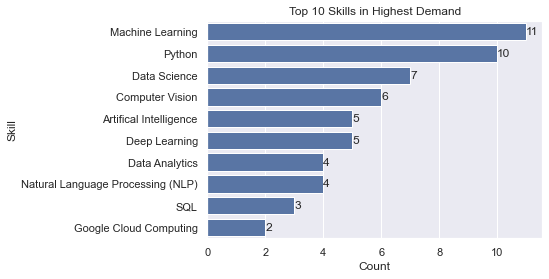

In [80]:
sns.set()
ax = sns.barplot(x = top10_skill_df.values, y = top10_skill_df.index, color='b')
abs_values = top10_skill_df.values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title("Top 10 Skills in Highest Demand")
plt.xlabel("Count")
plt.ylabel("Skill")
# plt.savefig("abcd.png", bbox_inches = "tight")

In [192]:
df["perks"] = df["perks"].apply(lambda x: ast.literal_eval(x))
p_list = []
for i in df["perks"]:
    p_list += i

perk_cnt = dict(Counter(p_list))
perk_cnt_dict = dict(sorted(perk_cnt.items(), key=operator.itemgetter(1),reverse=True))
perk_count_df = pd.DataFrame(perk_cnt_dict.items(), columns=['Skill', 'Count'])
perk_count_df[:10]

,Skill,Count
0,Certificate,467
1,Letter of recommendation,366
2,Flexible work hours,343
3,5 days a week,219
4,Job offer,150
5,Informal dress code,45
6,Free snacks & beverages,30


In [215]:
df[df.isna().any(axis=1)].index.to_list()
# index of all rows that have any nulls... will validate bad data out and you can log that row

[0]

In [217]:
bad_data = [0, 1, 2, 4, 5]

In [220]:
df.loc[bad_data].to_json()

'{"title":{"0":"Market Research (Analytics)","1":"Web Development","2":"WordPress Development","4":"WordPress Development","5":"Web Development"},"company":{"0":"Justdial Limited","1":"IIT Bombay","2":"NoBroker Technologies Solutions Private Limited","4":"Akeshya","5":"SilverOakHealth"},"location":{"0":"[\'Delhi\', \'Bangalore\', \'Mumbai\']","1":"[\'Work From Home\']","2":"[\'Bangalore\']","4":"[\'Work From Home\']","5":"[\'Work From Home\']"},"duration":{"0":null,"1":6.0,"2":3.0,"4":3.0,"5":2.0},"stipend":{"0":"2000 \\/month +  Incentives","1":"2000-5000 \\/month","2":"8000 \\/month","4":"4000 \\/month +  Incentives","5":"10000 \\/month"},"apply_by":{"0":"21 Jul\' 22","1":"20 Jul\' 22","2":"19 Jul\' 22","4":"26 Jul\' 22","5":"26 Jul\' 22"},"applicants":{"0":"132 applicants","1":"187 applicants","2":"47 applicants","4":"66 applicants","5":"121 applicants"},"skills":{"0":"[\'MS-Excel\', \'MS-Office\', \'MS-PowerPoint\', \'Research and Analytics\']","1":"[\'Django\', \'MongoDB\']","2":"

In [ ]:
with open("bad_data_files.log", "w") as f:
    for file in bad_data_list:
        f.write(file + "\n")
    f.close()

In [6]:
import pandas as pd
import ast
df = pd.read_csv("..\data\processed\prp_data.csv", parse_dates=["apply_by"])
df["skills"] = df["skills"].apply(lambda x: ast.literal_eval(x))
df["perks"] = df["perks"].apply(lambda x: ast.literal_eval(x))
df["apply_by"] = df["apply_by"].astype("int")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       16 non-null     object 
 1   company     16 non-null     object 
 2   location    16 non-null     object 
 3   duration    16 non-null     float64
 4   stipend     16 non-null     float64
 5   apply_by    16 non-null     int32  
 6   applicants  16 non-null     float64
 7   skills      16 non-null     object 
 8   perks       16 non-null     object 
 9   openings    16 non-null     int64  
 10  url         16 non-null     object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 1.4+ KB


In [8]:
d_avg = round(df["duration"].mean())
d_min = round(df["duration"].min())
d_min_count = (df["duration"] == d_min).sum()
d_max = round(df["duration"].max())
d_max_count = (df["duration"] == d_max).sum()
print(f"Average duration is {d_avg} month(s)")
print(f"Minimum duration is {d_min} month(s) offered by {d_min_count} internship(s)")
print(f"Maximum duration is {d_max} month(s) offered by {d_max_count} internship(s)")

Average duration is 4 month(s)
Minimum duration is 1 month(s) offered by 1 internship(s)
Maximum duration is 6 month(s) offered by 5 internship(s)


In [9]:
s_avg = round(df["stipend"].mean())
s_max = round(df["stipend"].max())
s_max_count = (df["stipend"] == s_max).sum()
print(f"Average stipend is Rs.{s_avg} / month")
print(f"Maximum stipend is Rs.{s_max} / month offered by {s_max_count} internship(s)")

Average stipend is Rs.8688 / month
Maximum stipend is Rs.30000 / month offered by 1 internship(s)


In [112]:
least_days = df["apply_by"].sort_values()[0:1].tolist()[0]
least_days_internship_count = (df["apply_by"] == least_days).sum()
if least_days <= 0:
    f"Hurry up! {least_days_internship_count} internships expiring by today!!!"
print(f"Hurry up! {least_days_internship_count} internships expiring in {least_days} day(s)!")
# add if else for today and tommorrow

Hurry up! 2 internships expiring in 0 day(s)!


In [11]:
early_appl_stage = (df["applicants"] == 0).sum()
thousand_plus = (df["applicants"] == 1000).sum()
print(f"{early_appl_stage} internships are in early application stage, apply fast !!!")
print(f"{thousand_plus} internships have 1000+ applicants, not very likely to receive response...")

0 internships are in early application stage, apply fast !!!
0 internships have 1000+ applicants, not very likely to receive response...


In [12]:
applicants_srs = df[(df["applicants"] != 0) & (df["applicants"] != 1000)]["applicants"]
a_avg = round(applicants_srs.mean())
a_min = round(applicants_srs.min())
a_max = round(applicants_srs.max())
print(f"Average applicants is {a_avg} / internship")

Average applicants is 332 / internship


In [13]:
from collections import Counter
import operator

s_list = []
for i in df["skills"]:
    s_list += i

skill_cnt = dict(Counter(s_list))
skill_cnt_dict = dict(sorted(skill_cnt.items(), key=operator.itemgetter(1),reverse=True))
skill_count_df = pd.DataFrame(skill_cnt_dict.items(), columns=['Skill', 'Count'])
skill_count_df[:10]
# top 10 skills highest in demand

,Skill,Count
0,Machine Learning,11
1,Python,10
2,Data Science,7
3,Computer Vision,6
4,Artifical Intelligence,5
5,Deep Learning,5
6,Data Analytics,4
7,Natural Language Processing (NLP),4
8,SQL,3
9,Google Cloud Computing,2


In [81]:
p_list = []
for i in df["perks"]:
    p_list += i

perk_cnt = dict(Counter(p_list))
perk_cnt_dict = dict(sorted(perk_cnt.items(), key=operator.itemgetter(1),reverse=True))
perk_count_df = pd.DataFrame(perk_cnt_dict.items(), columns=['Skill', 'Count'])
perk_count_df[:5]
# top 5 perks most commonly on offer

,Skill,Count
0,Certificate,13
1,Letter of recommendation,13
2,Flexible work hours,13
3,5 days a week,7
4,Job offer,5


In [15]:
o_avg = round(df["openings"].mean())
o_max = round(df["openings"].max())
print(f"Average openings is {o_avg} / internship")
print(f"Maximum openings in an internship is {o_max}")

Average openings is 4 / internship
Maximum openings in an internship is 10


In [16]:
df.head()

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Data Engineering,Blackcoffer,['Work From Home'],6.0,7000.0,11,155.0,"[Amazon Web Server (AWS), Artifical Intelligen...","[Certificate, Letter of recommendation, Flexib...",10,https://internshala.com/internship/detail/data...
1,Teaching (Basics of Python & Machine Learning),SURE Trust,['Work From Home'],4.0,0.0,10,138.0,"[Machine Learning, Python]","[Certificate, Letter of recommendation, Flexib...",4,https://internshala.com/internship/detail/teac...
2,Machine Learning/AI Research Content Writing,Marktechpost LLC,['Work From Home'],3.0,10000.0,8,167.0,"[Artifical Intelligence, Data Science, Deep Le...","[Letter of recommendation, Flexible work hours]",1,https://internshala.com/internship/detail/mach...
3,Course Development,Childo Education Research And Development Foun...,['Work From Home'],1.0,0.0,8,284.0,[],"[Certificate, Letter of recommendation, Flexib...",5,https://internshala.com/internship/detail/cour...
4,Curriculum Development (AI/ML),Sustainable Living Lab (SL2),['Work From Home'],3.0,15000.0,7,670.0,"[Artifical Intelligence, Data Science, Machine...","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/curr...


In [18]:
(df["skills"].astype("str").str.lower().apply(lambda x: "css" in x))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: skills, dtype: bool

In [19]:
a = [3,4,5]
b = [4,5,6]
c = []

In [20]:
c += a
c += b
list(set(c))

[3, 4, 5, 6]

In [24]:
import numpy as np
def get_skills_intersection_index(skills_list):
    intersection_skill_row_index = list(np.where(df["skills"].astype("str").str.lower().apply(lambda x: skills_list[0].lower() in x))[0])
    for skill in skills_list:
        sub_index = list(np.where(df["skills"].astype("str").str.lower().apply(lambda x: skill.lower() in x))[0])
        intersection_skill_row_index = list(set(intersection_skill_row_index) & set(sub_index))
    return intersection_skill_row_index

In [25]:
skills_list = ["css", "html", "python", "sql", "php", "mongodb", "tableau", "blabla", "werwer", "rwrwe"] 
# add a spelling validation for each skill before passing
intersection = get_skills_intersection_index(skills_list)

In [26]:
while not len(intersection) > 0:
    if len(skills_list) > 0:
        skills_list = skills_list[:-1]
        intersection = get_skills_intersection_index(skills_list)
    else:
        break
print(skills_list)
if len(intersection) > 0:
    print(df.loc[intersection])
else:
    print("Skills not found!") # this can never happen if u validate the entries as above

['css', 'html']
                   title      company            location  duration  stipend  \
7  Front End Development  TrueFoundry  ['Work From Home']       3.0  30000.0   

   apply_by  applicants                                    skills  \
7         5       403.0  [CSS, HTML, JavaScript, ReactJS, Vue Js]   

                                               perks  openings  \
7  [Certificate, Letter of recommendation, Flexib...         3   

                                                 url  
7  https://internshala.com/internship/detail/fron...  


In [27]:
df.loc[intersection]

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
7,Front End Development,TrueFoundry,['Work From Home'],3.0,30000.0,5,403.0,"[CSS, HTML, JavaScript, ReactJS, Vue Js]","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/fron...


In [28]:
top10_result_index = list(df.loc[intersection]["duration"].apply(lambda x: abs(x-4)).sort_values()[:10].index)

In [29]:
recommended_df = df.loc[top10_result_index].sort_values(["applicants"])

In [30]:
recommended_df

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
7,Front End Development,TrueFoundry,['Work From Home'],3.0,30000.0,5,403.0,"[CSS, HTML, JavaScript, ReactJS, Vue Js]","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/fron...


In [31]:
all_skills = []
for skills in df["skills"]:
    all_skills += skills
all_skills = list(set(all_skills))

In [32]:
# user entered these values lets say
skills_list = ['artifical intelligence']
duration = "54"

In [33]:
# validate it
def validate_skills_list(skills_list):
    condition = 0
    for skill in skills_list:
        if not skill.lower() in [i.lower() for i in all_skills]:
            condition = 1
            break
    if condition == 1:
        raise AttributeError("Skill entered not in list of skills.")
    elif condition == 0:
        return skills_list
    
def validate_duration(duration):
    try:
        return int(duration)
    except:
        raise AttributeError("Enter number of months as integer in duration.")

In [34]:
def get_skills_intersection_index(skills_list):
    intersection_skill_row_index = list(np.where(df["skills"].astype("str").str.lower().apply(lambda x: skills_list[0].lower() in x))[0])
    for skill in skills_list:
        sub_index = list(np.where(df["skills"].astype("str").str.lower().apply(lambda x: skill.lower() in x))[0])
        intersection_skill_row_index = list(set(intersection_skill_row_index) & set(sub_index))
    return intersection_skill_row_index

def get_recommendation(skills_list, duration):
    skills_list = validate_skills_list(skills_list)
    duration = validate_duration(duration)
    intersection = get_skills_intersection_index(skills_list)
    while not len(intersection) > 0:
        if len(skills_list) > 0:
            skills_list = skills_list[:-1]
            intersection = get_skills_intersection_index(skills_list)
        else:
            break
    skill_intersect_df = df.loc[intersection]
    top10_result_index = list(skill_intersect_df["duration"].apply(lambda x: abs(x-duration)).sort_values()[:10].index)
    recommended_df = df.loc[top10_result_index].sort_values(["applicants"])
    return recommended_df

In [88]:
get_recommendation(skills_list, duration)

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Data Engineering,Blackcoffer,['Work From Home'],6.0,7000.0,11,155.0,"[Amazon Web Server (AWS), Artifical Intelligen...","[Certificate, Letter of recommendation, Flexib...",10,https://internshala.com/internship/detail/data...
2,Machine Learning/AI Research Content Writing,Marktechpost LLC,['Work From Home'],3.0,10000.0,8,167.0,"[Artifical Intelligence, Data Science, Deep Le...","[Letter of recommendation, Flexible work hours]",1,https://internshala.com/internship/detail/mach...
6,Machine Learning,BsHappy Technologies,['Work From Home'],6.0,3000.0,6,445.0,"[Artifical Intelligence, Data Analytics, Data ...","[Certificate, Letter of recommendation, Flexib...",8,https://internshala.com/internship/detail/mach...
14,Data Annotation,KoiReader Technologies,['Work From Home'],3.0,4000.0,16,529.0,"[Artifical Intelligence, Computer Vision, Imag...","[Certificate, Flexible work hours]",8,https://internshala.com/internship/detail/data...
4,Curriculum Development (AI/ML),Sustainable Living Lab (SL2),['Work From Home'],3.0,15000.0,7,670.0,"[Artifical Intelligence, Data Science, Machine...","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/curr...


In [89]:
recommended_df = get_recommendation(skills_list, duration)

In [37]:
abcd = {}

In [38]:
abcd["recommended_df"] = recommended_df

In [39]:
abcd["recommended_df"]

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
7,Front End Development,TrueFoundry,['Work From Home'],3.0,30000.0,5,403.0,"[CSS, HTML, JavaScript, ReactJS, Vue Js]","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/fron...


In [40]:
all_categories_list = list(pd.read_excel("../all_category.xlsx").squeeze())

In [41]:
[('category1', 'Mustard'), ('category1', 'Ketchup'), ('wfh', 'on'), ('location', 'Guwahati')][0]

('category1', 'Mustard')

In [43]:
str(recommended_df)

"                   title      company            location  duration  stipend  \\\n7  Front End Development  TrueFoundry  ['Work From Home']       3.0  30000.0   \n\n   apply_by  applicants                                    skills  \\\n7         5       403.0  [CSS, HTML, JavaScript, ReactJS, Vue Js]   \n\n                                               perks  openings  \\\n7  [Certificate, Letter of recommendation, Flexib...         3   \n\n                                                 url  \n7  https://internshala.com/internship/detail/fron...  "

In [45]:
for i in all_categories_list:
    print(f"<option>{i}</option>")

<option>.NET Development</option>
<option>3D Printing</option>
<option>Accounts</option>
<option>Acting</option>
<option>Aerospace Engineering</option>
<option>Agriculture &amp; Food Engineering</option>
<option>Analytics</option>
<option>Anchoring</option>
<option>Android App Development</option>
<option>Angular.js Development</option>
<option>Animation</option>
<option>Architecture</option>
<option>Artificial Intelligence (AI)</option>
<option>ASP.NET Development</option>
<option>Audio Making/Editing</option>
<option>Automobile Engineering</option>
<option>Backend Development</option>
<option>Big Data</option>
<option>Bioinformatics</option>
<option>Biology</option>
<option>Biotechnology Engineering</option>
<option>Blockchain Development</option>
<option>Blogging</option>
<option>Brand Management</option>
<option>CAD Design</option>
<option>Campus Ambassador</option>
<option>Chartered Accountancy (CA)</option>
<option>Chemical Engineering</option>
<option>Chemistry</option>
<option>

In [82]:
a_list = ["abc", "def"]

In [86]:
", ".join(a_list)

'abc, def'

In [114]:
recommended_df

,title,company,location,duration,stipend,apply_by,applicants,skills,perks,openings,url
0,Data Engineering,Blackcoffer,['Work From Home'],6.0,7000.0,11,155.0,"[Amazon Web Server (AWS), Artifical Intelligen...","[Certificate, Letter of recommendation, Flexib...",10,https://internshala.com/internship/detail/data...
2,Machine Learning/AI Research Content Writing,Marktechpost LLC,['Work From Home'],3.0,10000.0,8,167.0,"[Artifical Intelligence, Data Science, Deep Le...","[Letter of recommendation, Flexible work hours]",1,https://internshala.com/internship/detail/mach...
6,Machine Learning,BsHappy Technologies,['Work From Home'],6.0,3000.0,6,445.0,"[Artifical Intelligence, Data Analytics, Data ...","[Certificate, Letter of recommendation, Flexib...",8,https://internshala.com/internship/detail/mach...
14,Data Annotation,KoiReader Technologies,['Work From Home'],3.0,4000.0,16,529.0,"[Artifical Intelligence, Computer Vision, Imag...","[Certificate, Flexible work hours]",8,https://internshala.com/internship/detail/data...
4,Curriculum Development (AI/ML),Sustainable Living Lab (SL2),['Work From Home'],3.0,15000.0,7,670.0,"[Artifical Intelligence, Data Science, Machine...","[Certificate, Letter of recommendation, Flexib...",3,https://internshala.com/internship/detail/curr...


In [115]:
recommended_df.columns

Index(['title', 'company', 'location', 'duration', 'stipend', 'apply_by',
       'applicants', 'skills', 'perks', 'openings', 'url'],
      dtype='object')

In [116]:
rdf = recommended_df[['title', 'company', 'duration', 'stipend', 'apply_by', 'openings', 'url']]
# rdf.columns = ["Title", "Company", "Duration", "Stipend", "Apply By", "Openings", "url"]
rdf

,title,company,duration,stipend,apply_by,openings,url
0,Data Engineering,Blackcoffer,6.0,7000.0,11,10,https://internshala.com/internship/detail/data...
2,Machine Learning/AI Research Content Writing,Marktechpost LLC,3.0,10000.0,8,1,https://internshala.com/internship/detail/mach...
6,Machine Learning,BsHappy Technologies,6.0,3000.0,6,8,https://internshala.com/internship/detail/mach...
14,Data Annotation,KoiReader Technologies,3.0,4000.0,16,8,https://internshala.com/internship/detail/data...
4,Curriculum Development (AI/ML),Sustainable Living Lab (SL2),3.0,15000.0,7,3,https://internshala.com/internship/detail/curr...


In [118]:
rdf["apply_by"].apply(lambda x: f"{str(x)} days" if x > 0 else "Today!!")

0     11 days
2      8 days
6      6 days
14    16 days
4      7 days
Name: apply_by, dtype: object

In [110]:
rdf["duration"] = rdf["duration"].apply(lambda x: f"{str(int(x))} month(s)")
rdf["stipend"] = rdf["stipend"].apply(lambda x: f"Rs.{str(int(x))} / month")
rdf["apply_by"] = rdf["apply_by"].apply(lambda x: f"{str(x)} days")

C:\Users\rishi\AppData\Local\Temp\ipykernel_13836\2117281585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["duration"] = rdf["duration"].apply(lambda x: f"{str(int(x))} Month(s)")
C:\Users\rishi\AppData\Local\Temp\ipykernel_13836\2117281585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["stipend"] = rdf["stipend"].apply(lambda x: f"Rs.{str(int(x))} / Month")
C:\Users\rishi\AppData\Local\Temp\ipykernel_13836\2117281585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [113]:
rdf

,title,company,duration,stipend,apply_by,openings,url
0,Data Engineering,Blackcoffer,6 Month(s),Rs.7000 / Month,11 days,10,https://internshala.com/internship/detail/data...
2,Machine Learning/AI Research Content Writing,Marktechpost LLC,3 Month(s),Rs.10000 / Month,8 days,1,https://internshala.com/internship/detail/mach...
6,Machine Learning,BsHappy Technologies,6 Month(s),Rs.3000 / Month,6 days,8,https://internshala.com/internship/detail/mach...
14,Data Annotation,KoiReader Technologies,3 Month(s),Rs.4000 / Month,16 days,8,https://internshala.com/internship/detail/data...
4,Curriculum Development (AI/ML),Sustainable Living Lab (SL2),3 Month(s),Rs.15000 / Month,7 days,3,https://internshala.com/internship/detail/curr...
